# Assessment : Assignment3
## Module Name: Learning From Data
## Author: Kinja Mirindi
## Student Number: 217085510
## Date: 2023/04/13

In [1]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
palette = sns.color_palette("Spectral")


import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('winequality_red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [2]:
n = df.count()
mean_ = df.mean()
median_ = df.median()
mode_ = df.apply(lambda x: x.value_counts().idxmax())
std_ = np.sqrt(df.apply(lambda x: np.sum((x -
x.mean())**2)) / (n - 1))
var_ = std_ ** 2
kurtosis_ = df.apply(lambda x: np.sum(((x - x.mean())
/ x.std())**4)) / n - 3
skewness_ = df.apply(lambda x: np.sum(((x - x.mean())
/ x.std())**3)) / n
range_ = df.max() - df.min()
min_ = df.min()
max_ = df.max()
sum_ = df.sum()
count_ = df.count()
largest_1 = df.apply(lambda x: x.nlargest(1).iloc[0])
smallest_1 = df.apply(lambda x: x.nsmallest(1).iloc[0])
cv_ = std_ / mean_
quartile1_ = df.apply(lambda x: np.percentile(x, 25))
quartile2_ = df.apply(lambda x: np.percentile(x, 50))
quartile3_ = df.apply(lambda x: np.percentile(x, 75))
interquartileRange_ = quartile3_ - quartile1_
mad_ =df.apply(lambda x: np.mean(np.abs(x - x.mean())))
mead_ = df.apply(lambda x: np.median(np.abs(x - x.median())))
qcd_ = (quartile3_ - quartile1_) / (quartile3_ + quartile1_)
percentile10_ = df.apply(lambda x: np.percentile(x, 10))
percentile90_ = df.apply(lambda x: np.percentile(x, 90))






#z_scores_all = (water_potability - mean_all) / std_all


summary_df = pd.DataFrame({'Mean': mean_, 'Median': median_,
'Mode': mode_, 'Standard Deviation': std_,
                           'Sample Variance': var_, 'Kurtosis':
kurtosis_, 'Skewness': skewness_,
                           'Range': range_, 'Minimum': min_,
'Maximum': max_, 'Sum': sum_, 'Count': count_,
                           'Largest(1)': largest_1, 'Smallest(1)':
smallest_1,'Coefficient of Variation' : cv_,  'Quartile 1':  quartile1_, 'Quartile 2' : quartile2_, 'Quartile 3' : quartile3_, 'InterQuartile Range' : interquartileRange_, 'Mean Absolute Deviation' :  mad_, 'Median Absolute Deviation' :  mead_, 'Quartile Coefficient of Disperssion' : qcd_, 'Percentile 10' : percentile10_, 'Percentile 90' :  percentile90_ })
# Add borders to the table
summary_df_styled = summary_df.style.set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                                                       {'selector': 'td', 'props': [('border', '1px solid black')]}]) \
                                     .background_gradient(cmap='coolwarm', axis=None)


# Display the styled table
summary_df_styled

,Mean,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Largest(1),Smallest(1),Coefficient of Variation,Quartile 1,Quartile 2,Quartile 3,InterQuartile Range,Mean Absolute Deviation,Median Absolute Deviation,Quartile Coefficient of Disperssion,Percentile 10,Percentile 90
fixed acidity,8.319637,7.900000,7.200000,1.741096,3.031416,1.119699,0.980908,11.300000,4.600000,15.900000,13303.100000,1599,15.900000,4.600000,0.209276,7.100000,7.900000,9.200000,2.100000,1.360136,1.000000,0.128834,6.500000,10.700000
volatile acidity,0.527821,0.520000,0.600000,0.179060,0.032062,1.212689,0.670333,1.460000,0.120000,1.580000,843.985000,1599,1.580000,0.120000,0.339244,0.390000,0.520000,0.640000,0.250000,0.142391,0.120000,0.242718,0.310000,0.745000
citric acid,0.270976,0.260000,0.000000,0.194801,0.037947,-0.793046,0.317740,1.000000,0.000000,1.000000,433.290000,1599,1.000000,0.000000,0.718888,0.090000,0.260000,0.420000,0.330000,0.164654,0.170000,0.647059,0.010000,0.522000
residual sugar,2.538806,2.200000,2.000000,1.409928,1.987897,28.485020,4.532140,14.600000,0.900000,15.500000,4059.550000,1599,15.500000,0.900000,0.555351,1.900000,2.200000,2.600000,0.700000,0.764065,0.300000,0.155556,1.700000,3.600000
chlorides,0.087467,0.079000,0.080000,0.047065,0.002215,41.525963,5.669694,0.599000,0.012000,0.611000,139.859000,1599,0.611000,0.012000,0.538095,0.070000,0.079000,0.090000,0.020000,0.021773,0.010000,0.125000,0.060000,0.109000
free sulfur dioxide,15.874922,14.000000,6.000000,10.460157,109.414884,2.007221,1.248222,71.000000,1.000000,72.000000,25384.000000,1599,72.000000,1.000000,0.658911,7.000000,14.000000,21.000000,14.000000,8.187527,7.000000,0.500000,5.000000,31.000000
total sulfur dioxide,46.467792,38.000000,28.000000,32.895324,1082.102373,3.785676,1.512689,283.000000,6.000000,289.000000,74302.000000,1599,289.000000,6.000000,0.707917,22.000000,38.000000,62.000000,40.000000,25.354053,18.000000,0.476190,14.000000,93.200000
density,0.996747,0.996750,0.997200,0.001887,0.000004,0.922500,0.071154,0.013620,0.990070,1.003690,1593.797940,1599,1.003690,0.990070,0.001893,0.995600,0.996750,0.997835,0.002235,0.001433,0.001130,0.001121,0.994556,0.999140
pH,3.311113,3.310000,3.300000,0.154386,0.023835,0.795919,0.193320,1.270000,2.740000,4.010000,5294.470000,1599,4.010000,2.740000,0.046627,3.210000,3.310000,3.400000,0.190000,0.119769,0.100000,0.028744,3.120000,3.510000
sulphates,0.658149,0.620000,0.600000,0.169507,0.028733,11.661529,2.424118,1.670000,0.330000,2.000000,1052.380000,1599,2.000000,0.330000,0.257551,0.550000,0.620000,0.730000,0.180000,0.119094,0.080000,0.140625,0.500000,0.850000


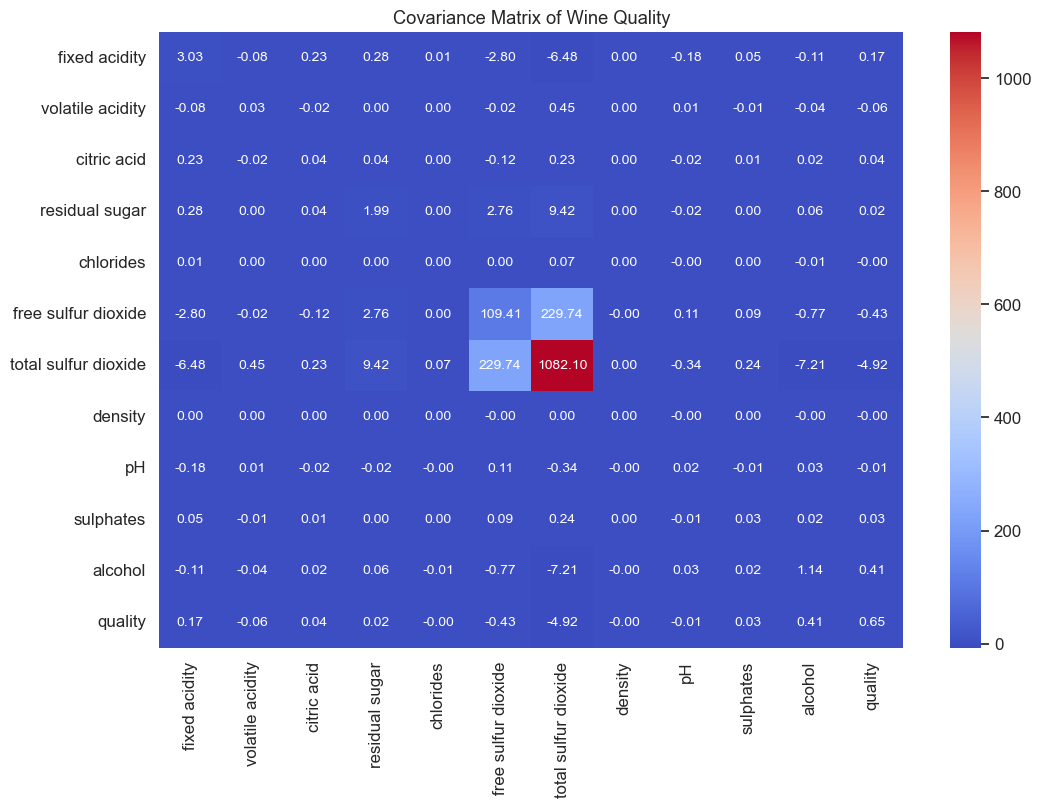

In [32]:
def covariance(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    return np.sum((x - x_mean) * (y - y_mean)) / (len(x) - 1)

# Calculate the covariance matrix using the covariance function
covariance_matrix = df.apply(lambda x: df.apply(lambda y: covariance(x, y)))

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f',
annot_kws={"size": 10})
plt.title('Covariance Matrix of Wine Quality')
plt.show()

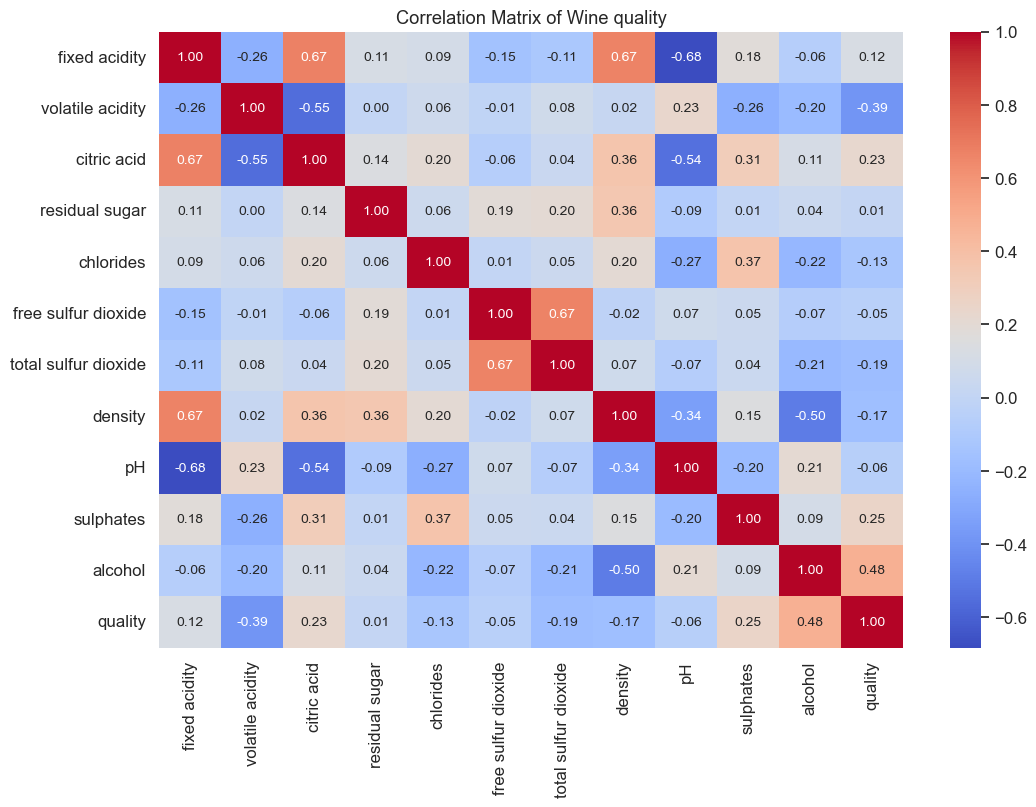

In [4]:

def correlation(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

    return numerator / denominator

# Calculate the correlation matrix using the pearson_correlation function
correlation_matrix = df.apply(lambda x:
df.apply(lambda y: correlation(x, y)))
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Wine quality')
plt.show()

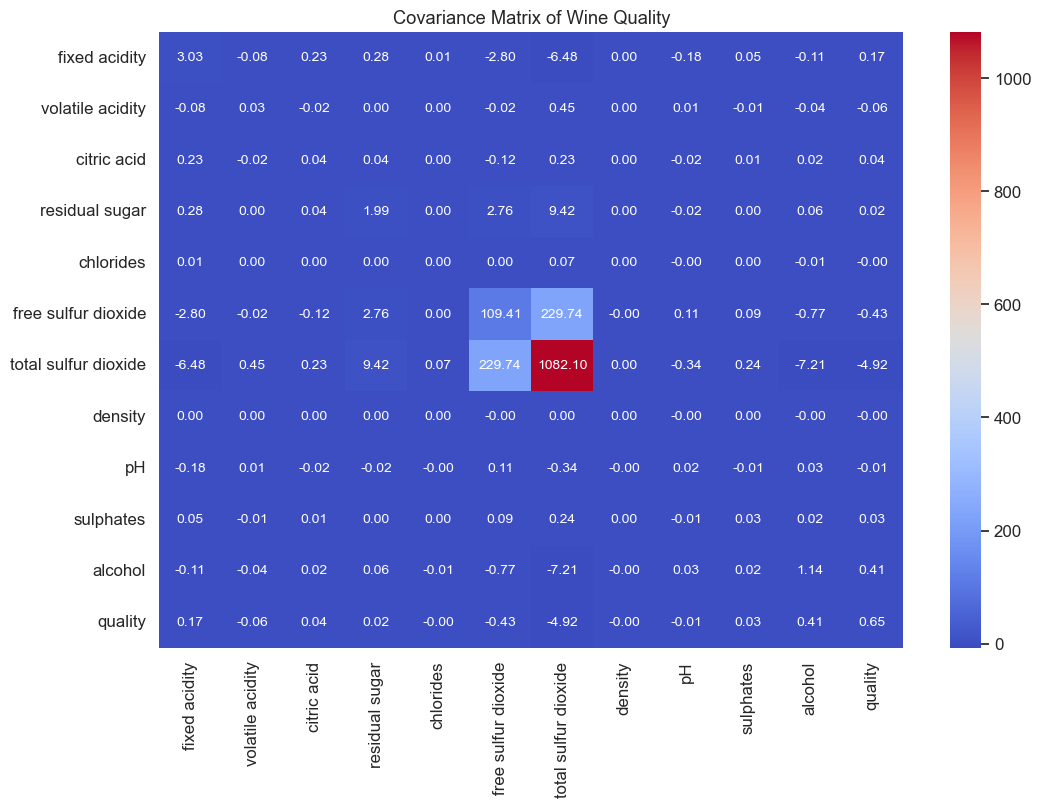

In [31]:
def covariance(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    return np.sum((x - x_mean) * (y - y_mean)) / (len(x) - 1)

# Calculate the covariance matrix using the covariance function
covariance_matrix = df.apply(lambda x: df.apply(lambda y: covariance(x, y)))

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f',
annot_kws={"size": 10})
plt.title('Covariance Matrix of Wine Quality')
plt.show()

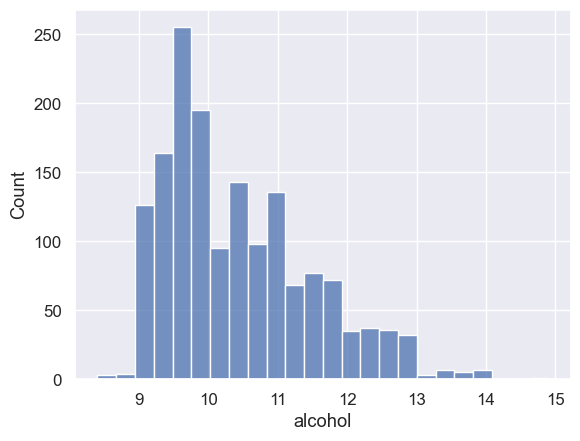

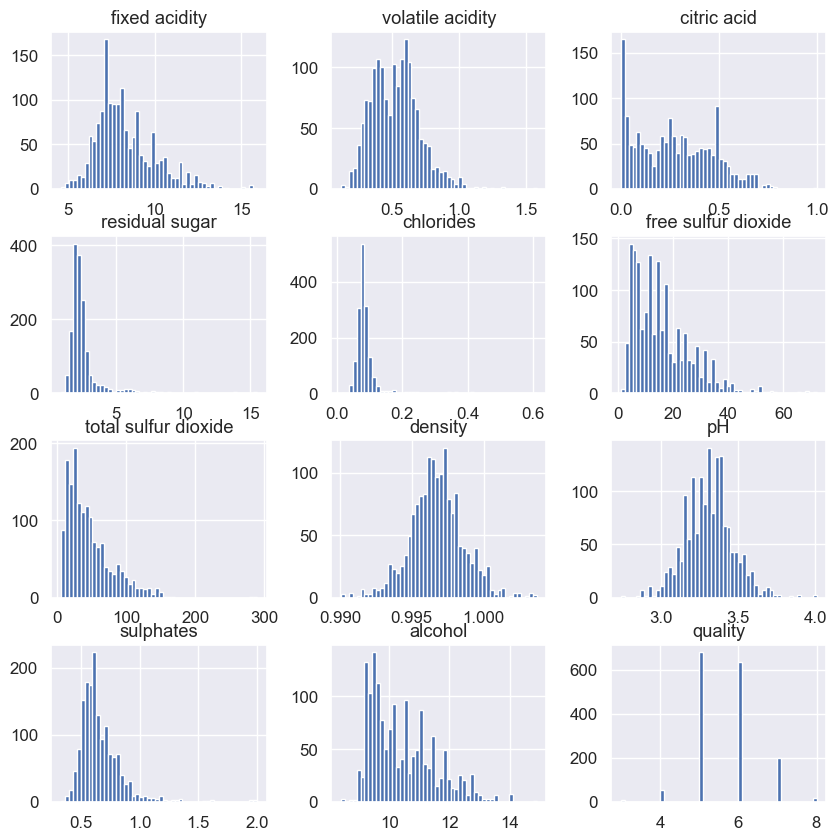

In [5]:
sns.histplot(df['alcohol'])
df.hist(figsize=(10,10),bins=50)
plt.show()

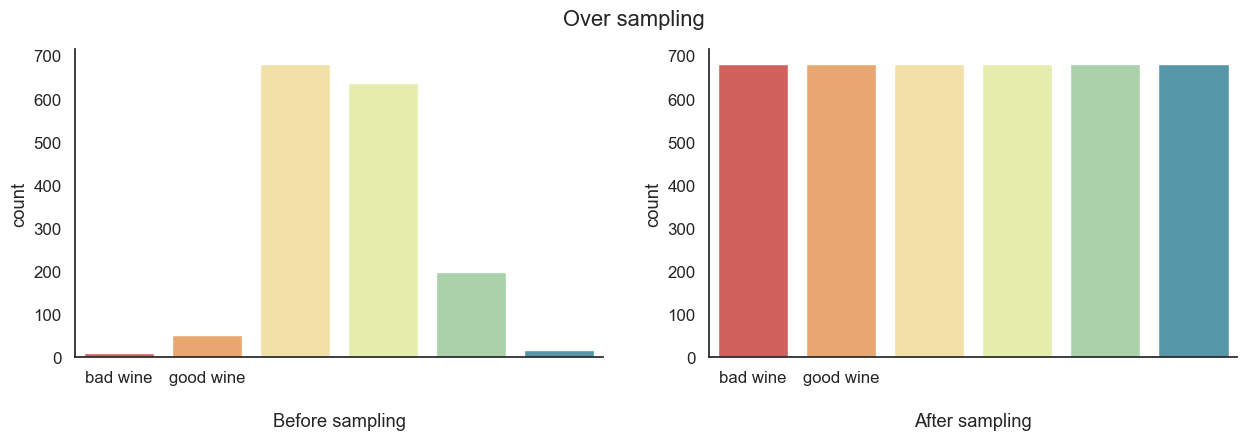

In [6]:
from imblearn.over_sampling import SMOTE

X = df.drop(['quality'], axis=1)
y = df.quality

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
sns.set_style("white")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='quality', palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nBefore sampling")

plt.subplot(1, 2, 2)
sns.countplot(x=y_smote, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nAfter sampling")

plt.suptitle('Over sampling \n\n\n')

sns.despine()

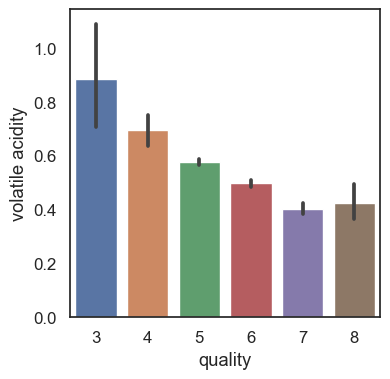

In [7]:
plt.figure(figsize=(4,4))
sns.barplot(x="quality",y="volatile acidity",data=df)
plt.show()

<Axes: >

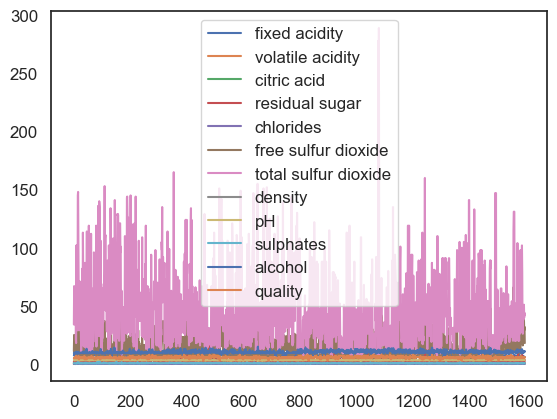

In [9]:
df.plot()

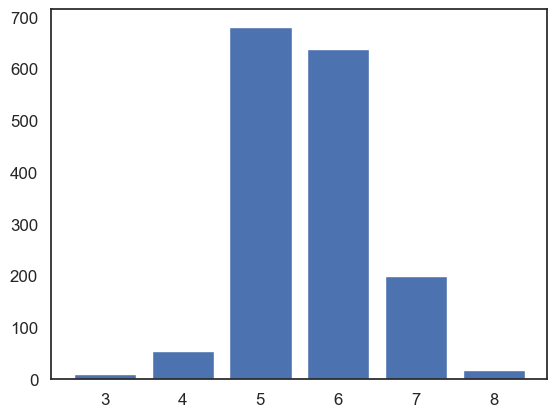

In [12]:
quality_counts = df['quality'].value_counts()
plt.bar(quality_counts.index, quality_counts.values)
plt.show()

#### relation between each feature and output

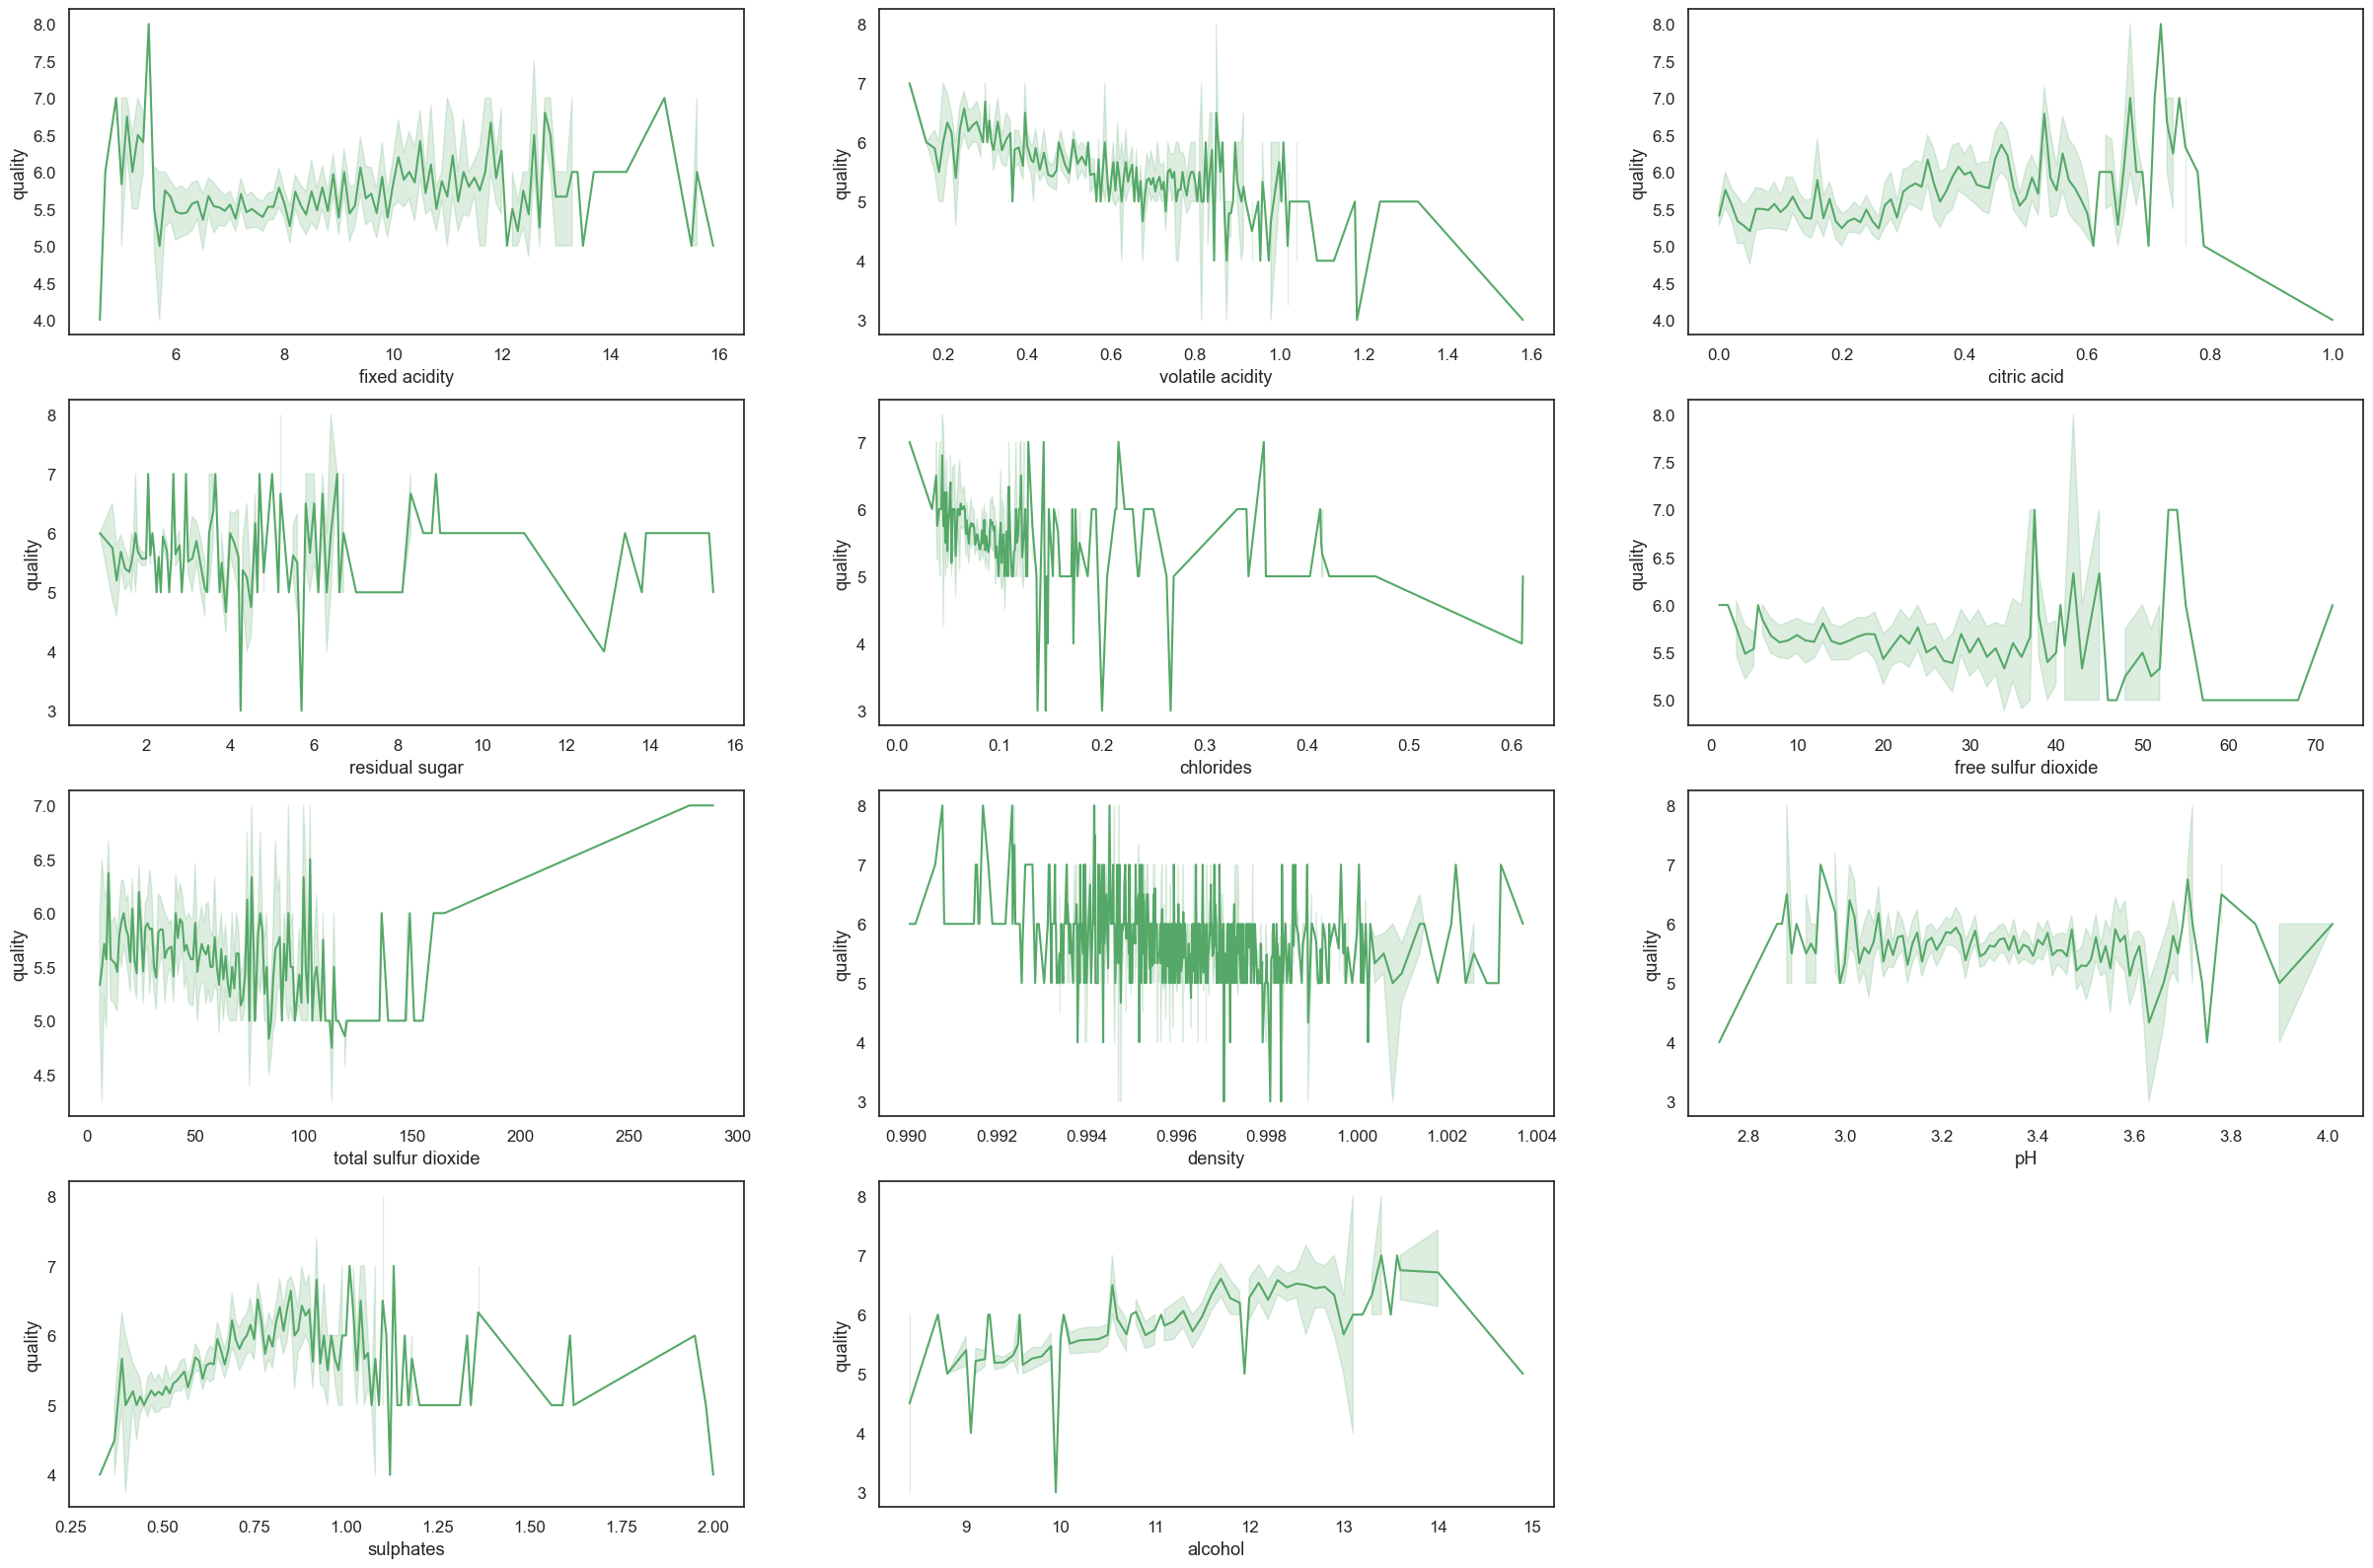

In [18]:
# relation between each feature and output
data_feature = df.columns[:-1]
plt.figure(figsize=(30,30))
for i in range(len(data_feature)):
  plt.subplot(6,3,i+1)
  sns.lineplot(x=df[str(data_feature[i])],y=df['quality'],c='g')

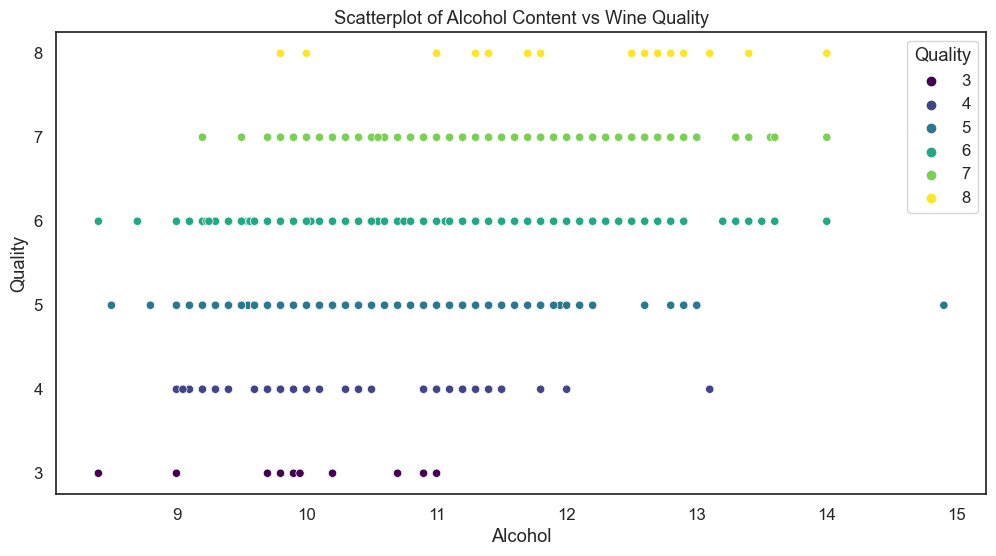

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='alcohol', y='quality', data=df, hue='quality',
palette='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Scatterplot of Alcohol Content vs Wine Quality')
plt.legend(title='Quality')
plt.show()

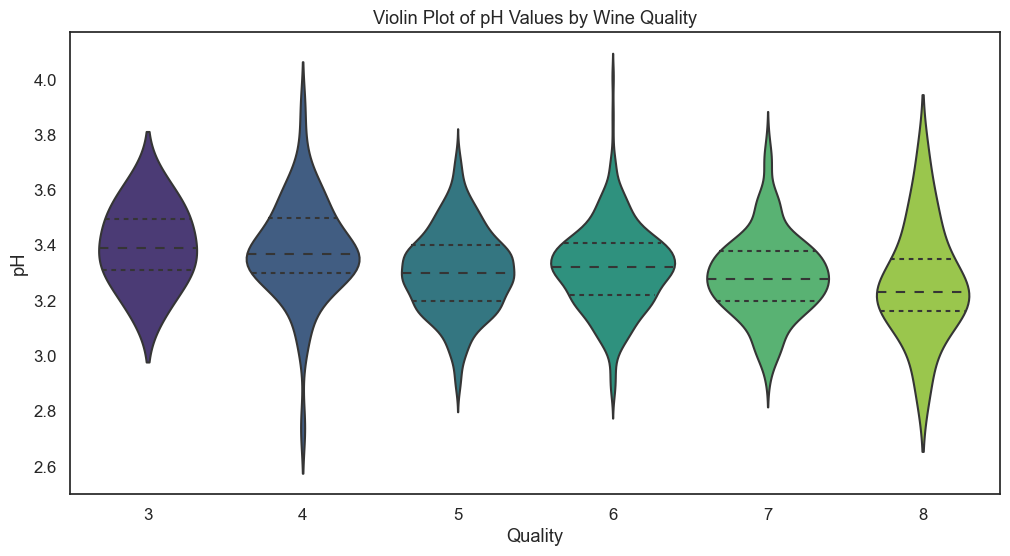

In [29]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='quality', y='pH', data=df, palette='viridis',
inner='quartile')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Violin Plot of pH Values by Wine Quality')
plt.show()

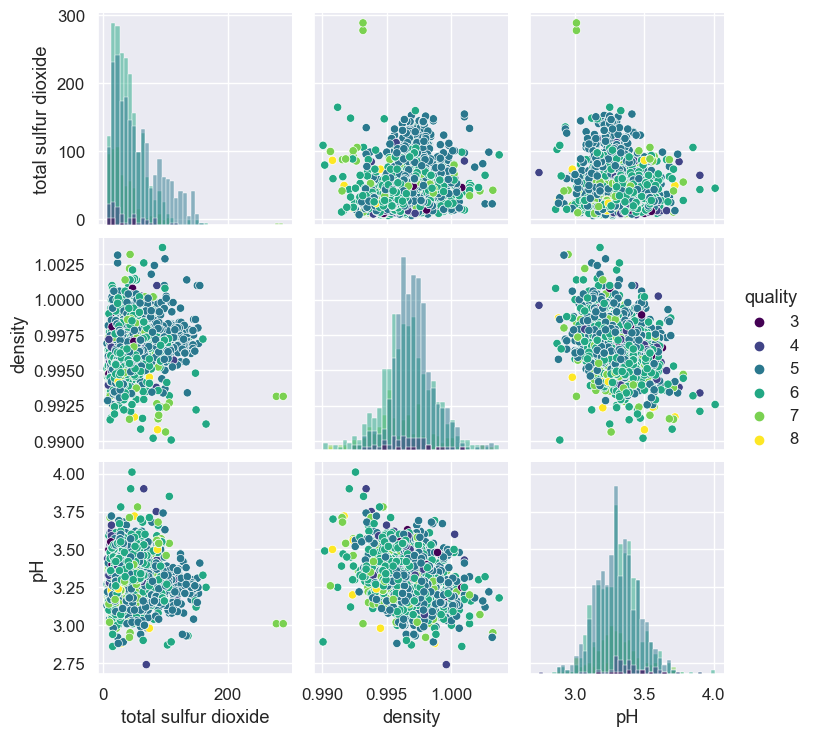

In [33]:
sns.pairplot(df[['total sulfur dioxide', 'density', 'pH', 'quality']],
hue='quality', palette='viridis', diag_kind='hist')
plt.show()

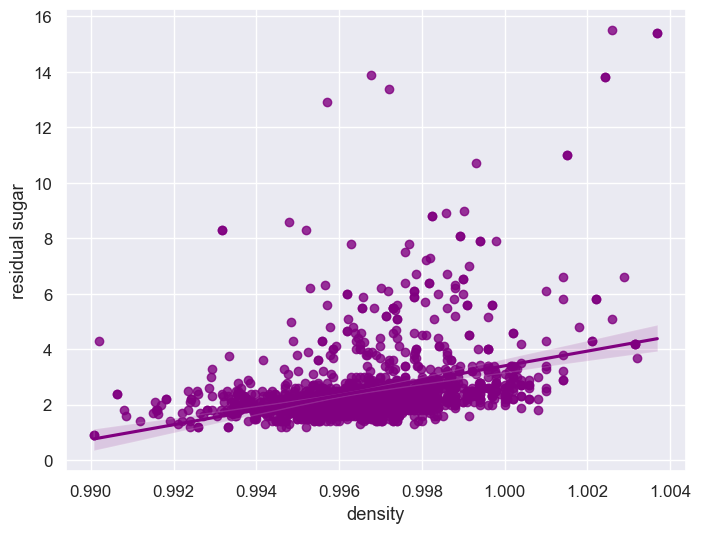

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot(x='density', y='residual sugar', data=df, color='purple')
plt.show()

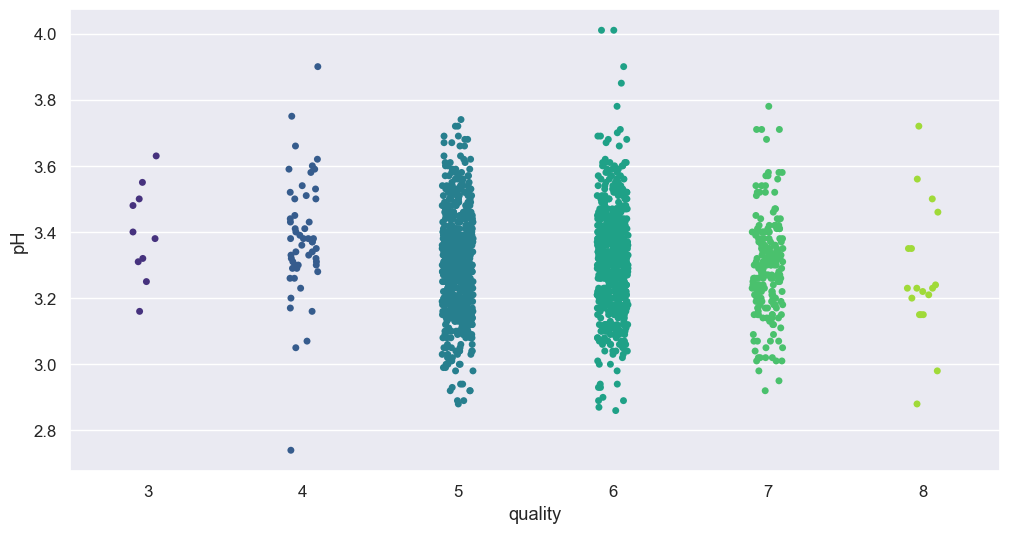

In [35]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='quality', y='pH', data=df, palette='viridis', jitter=True)
plt.show()

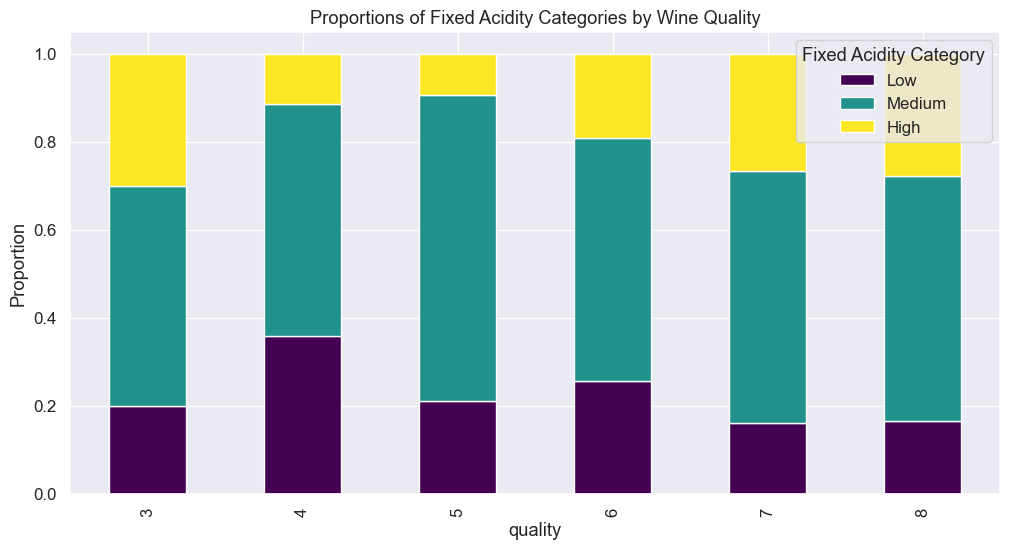

In [36]:
# Create a new categorical variable for fixed acidity
df['fixed_acidity_category'] = pd.cut(df['fixed acidity'], bins=[0, 7,
10, np.inf], labels=['Low', 'Medium', 'High'])

# Calculate proportions
grouped = df.groupby(['quality',
'fixed_acidity_category']).size().unstack().fillna(0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked barplot
proportions.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.ylabel('Proportion')
plt.title('Proportions of Fixed Acidity Categories by Wine Quality')
plt.legend(title='Fixed Acidity Category')
plt.show()

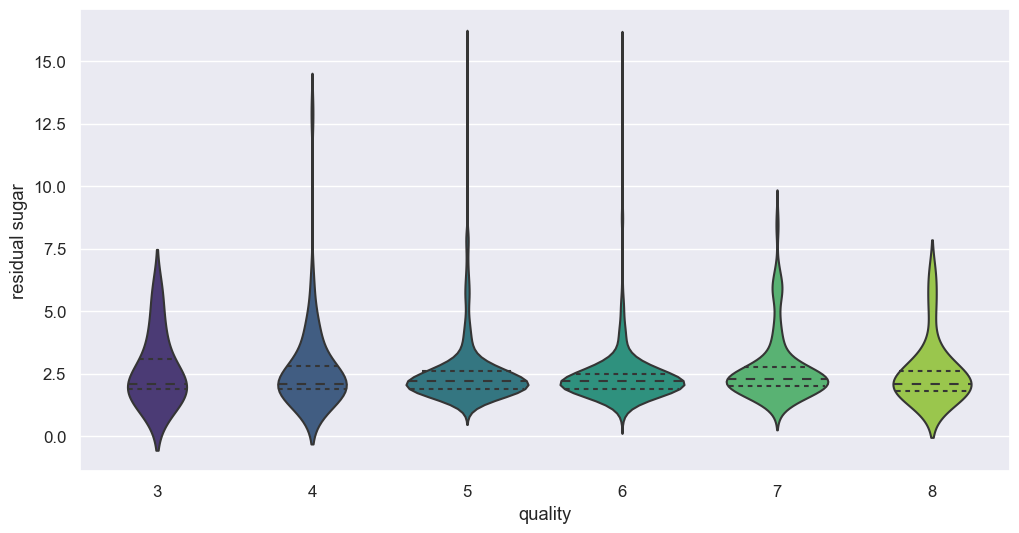

In [37]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='quality', y='residual sugar', data=df,
palette='viridis', inner='quartile')
plt.show()

## Reflections on learnings between using Excel and Python to apply Descriptive Statistics

aaaaaaa